# Tutorial 01

## NI-PDD Preliminaries

Tutorials for NI-PDD will be provided as [jupyter notebooks](https://jupyter.org/).

Jupyter cheat-sheet: https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/.

We assume that students are already familliar with the following scientific packages for Python:

### NumPy 
  * Package for fast "scientific" computing (especially linear algebra and random numbers capabilities).
  * Mostly an interface to fast C/C++/Fortran libraries.
  * http://www.numpy.org/

### pandas
  * Popular data analysis toolkit.
  * Helps to easily manipulate with **tabular** data.
  * http://pandas.pydata.org/

### scikit-learn (sklearn)
  * Data science tools and methods in Python.
  * Built on NumPy, [SciPy](https://www.scipy.org/), and matplotlib
  * http://scikit-learn.org/stable/
  
### matplotlib
  * Fundamental 2D plotting library.
  * https://matplotlib.org/

### seaborn
  * Data visualisation tool based on matplotlib.
  * https://seaborn.pydata.org/
  

Windows binaries can be found [here](https://www.lfd.uci.edu/~gohlke/pythonlibs/).


## Motivation

This course covers data preprocessing, i.e. construction and transformation of datasets used to solve a machine learning task.

![title](proces.pdf)


### Literature

Some basic literature:

* Hastie, T.; Tibshirani, R.; Friedman, J. The Elements of Statistical Learning. Springer. 2013.
* Kuhn, M.; Johnson, K. Feature Engineering and Selection: A Practical Approach for Predictive Models. [online version](http://www.feat.engineering/intro-intro.html)
* Zheng, A.; Casari, A. Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. O'Reilly. 2018.


## Data exploration, validation and cleaning

Let's show data exploration methods on [titanic dataset](https://www.kaggle.com/c/titanic/data) from [Kaggle](https://www.kaggle.com/). The dataset is devoted to predict survival (binary classification task).


### Import

In [1]:
# Only basic libraries here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Data load

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head() # returns first n rows of DataFrame, deafult n=5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Domain/Dataset description
* PassengerId - ID of each observation.
* Survived - target/output feature, contains 1 if the passenger is survived or 0 if not.
* Pclass - the ticket class (socio-economic status) of each passenger on the ship.
* Name - entire name of each passenger.
* Sex - sex of each passenger.
* Age - age in years of each passenger. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5.
* SibSp - number of siblings/spouses, i.e. sibling = brother, sister, stepbrother, stepsister; spouse = husband, wife (mistresses and fiances were ignored).
* Parch - number of of parents/children, i.e. parent = mother, father; child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket - ticket number.
* Fare - passenger fare.
* Cabin - cabin number.
* Embarked - port of Embarkation, i.e. C = Cherbourg, Q = Queenstown, S = Southampton.


## Data types & measurement scales
Data types from a content point of view:

* **Nominal (categorical)** - Individual values without any quantitative meaning and inherent order. Often can be used as labels.
* **Dichotomous** - Same as nominal with only two possible values.
* **Ordinal** - Nominal with order which is important and significant. The meaning of differences between values is not specified.
* **Numeric discrete** - Ordered and differences have a clear meaning.
* **Numeric continuous (interval/ratio)** - Any value in some admissible range.
* **Multidimensional** - Combinations of previous, represented as texts, vectors etc.

Data types from a storage point of view:
* **Int** - Nominal, Dichotomous, Ordinal and Numeric discrete.
* **Float** - Everything one dimensional.
* **Text** - Nominal, Dichotomous, and Multidimensional. Usually no numeric meaning.
* **Date** - Internally corresponds to Numeric continuous or discrete.
* etc.

In [4]:
# obtain basic data info
display(df.shape) # prints the amount of rows and column numbers
display(df.columns) # prints column names of dataset
display(df.dtypes) # lists data types of all columns
display(df.info()) # basic info about entries including number of non-null values

(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

We can see that Age, Cabin and Embarked columns contain missing data. Missing data imputation is the topic of second NI-PDD tutorial.

Also there are 5 columns of object data type. It means that they contain text or mixed numeric and non-numeric values. Machine learning models require all input and output variables to be numeric. We can’t do matrix multiplication on a string, so we must convert all strings to some numeric representation. This will be treated in following tutorials. 

## Data validation
### Domain
Set (range) of admissible values for each feature.

In [5]:
# counts of unique values for all columns
df.nunique()
# !!!!! nan are not counted !!!!

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              4
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
# generate descriptive statistics of numeric features, nan are not taken into account
df.describe()
#df.describe(include='all') # includes all types of features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Fare has minimum 0 and maximum 512 - but these values are valid from the domain point of view.

In [7]:
# minimal and maximal values for numeric features
df.select_dtypes(include=['int64', 'float64']).apply(['min', 'max'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,1,0,1,0.42,0,0,0.0000
max,891,1,3,80.00,8,6,512.3292


#### Task - Name Validation

* Check Name at least via its length. Motivation: Too short names can be suspicious.
* The task is to create NameLen feature which will contain number of characters.

It might be helpfull to use [str.len](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.len.html).

In [9]:
# your code here

df['NameLen'] = df['Name'].str.len() 



In [11]:
# observe NameLen 3 largest values
# your code here

df.loc[df.NameLen.nlargest(3).index]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9,C65,C,82
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0,NaN,S,67
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6,A16,C,65


In [12]:
# observe NameLen 3 smallest values
# your code here

df.loc[df.NameLen.nsmallest(3).index]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen
711,712,0,1,??,male,NaN,0,0,113028,26.5500,C124,S,2
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,12
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,12


Name = ?? will be cleaned later.

#### Boxplot 

Useful visualisation of a domain for numeric data.
* The bottom and top of the box are always the first and third quartiles. Their difference is called the inter-quartile range (IQR).
* The band inside the box is always the second quartile (the median).
* Two lines (whiskers) outside the box extends to the smallest (minimum) and largest (maximum) observation excluding outliers.
* Points correspond to “outliers” determined by the following rule of thumb: if they fall at least 1.5 IQR above the third quartile or 1.5 IQR below the first quartile.

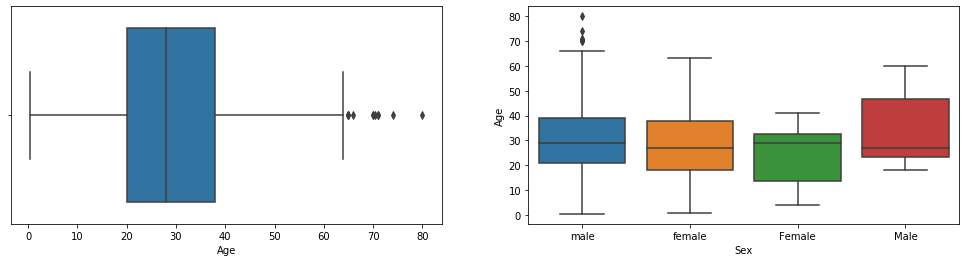

In [13]:
plt.figure(figsize=(17, 4)) # create a new figure, or activate an existing figure, width, height in inches
plt.subplot(1,2,1) # add a subplot to the current figure, (nrows, ncols, index)
sns.boxplot(x="Age", data=df)
plt.subplot(1,2,2)
sns.boxplot(x='Sex', y='Age', data=df)

In [ ]:
# influence of Sex on NameLen
sns.boxplot(x='Sex', y='NameLen', data=df)

#### Data Distributions

The most common approach to visualizing a distribution is the **histogram**.
It is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar.

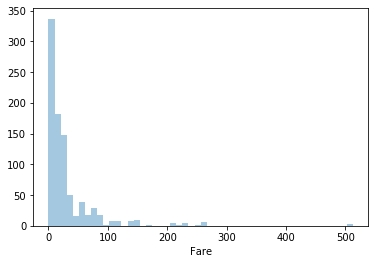

In [14]:
sns.distplot(df.Fare, kde=False) # cannot work if there are NaNs in data

In [ ]:
df.Age.hist()

### Consistency
Same things are represented in the same way.
#### Task - check consistency of Sex

In [16]:
# consistency check
display(df['Sex'].unique())

array(['male', 'female'], dtype=object)

* Repair Sex representation - part of data cleaning.
* -> make it lowercase.

In [15]:
# your code here
df['Sex'] = df['Sex'].apply(lambda x: x.lower())



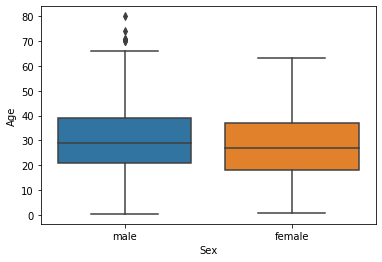

In [17]:
sns.boxplot(x='Sex', y='Age', data=df)

### Integrity of relationships between columns (logical integrity)
This type of integrity is concerned with the correctness or rationality of a piece of data, given a particular context. 
This means that values in a group of features may follow some contextual constrains. E.g. Female name should not occur for the male person.

In [ ]:
# example of female's name
display(df.Name[df['Sex'] == 'female'].head())
# example of male's name
display(df.Name[df['Sex'] == 'male'].head())

In [ ]:
# Preparation for title, firstname, and surname extraction from the name
# https://docs.python.org/2/library/re.html
import re
pattern = re.compile('\A\s*([^,]+),\s*([^\.]+\.)\s*([^\(]*)\s*(\(\s*([^\)]*)\s*\))?(.*)\Z') 

def split_name(name):
    if type(name) is not str:
        return np.nan, np.nan, np.nan
    else:
        m = pattern.match(name)
        if m:
            res = m.groups()
            return res[1].strip(), res[0].strip(), res[2].strip()
        else:
            return np.nan, np.nan, np.nan

In [ ]:
# integrity for name titles
df['Title'], df['Surname'], df['Firstnames'] = zip(*df.Name.apply(split_name))

display(df.head(2))

# print unique titles
df['Title'].unique()

In [ ]:
# show titles for males and females

print('Male:', list(df[df['Sex']=='male']['Title'].unique()))
print('Female:', list(df[df['Sex']=='female']['Title'].unique()))

In [ ]:
# show males without a title
df[(df.Sex == "male") & df.Title.isnull()]

## Data cleaning
Data cleaning is the process of detecting (data validation) and correcting (or removing) corrupt or inaccurate records from data and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

### Data conversion
Convert data to suitable format.

In [ ]:
# show all non-numeric fields
df.select_dtypes(include=['object']).head()

#### Pandas categorical data 
Suitable for storing nominal and ordinal values.

In [ ]:
# Convert nominal values of Sex stored in strings to pandas categorical format
sex_category = pd.api.types.CategoricalDtype(categories=["male","female"], ordered=False)
df['Sex'] = df['Sex'].astype(sex_category)
     
# show results
display(df['Sex'].unique())
display(df.head(2))

In [ ]:
# Convert ordinal values of Pclass to pandas categorical format with ordering
pclass_category = pd.api.types.CategoricalDtype(categories=[1,2,3], ordered=True)
df['Pclass'] = df['Pclass'].astype(pclass_category)
    
display(df['Pclass'].describe())
display(df['Pclass'].unique())

display(df.head(2))

However, most machine learning models require all input and output variables to be numeric. Encoding methods such as ordinal encoding, one-hot encoding or dummy values encoding exist for this purpose. These methods will be described during lectures and perhaps in the following tutorials.